# Medical Data Visualizer

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
!wget https://raw.githubusercontent.com/a-mt/fcc-medical-data-visualizer/refs/heads/master/medical_examination.csv

--2025-01-18 05:06:24--  https://raw.githubusercontent.com/a-mt/fcc-medical-data-visualizer/refs/heads/master/medical_examination.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2941524 (2.8M) [text/plain]
Saving to: ‘medical_examination.csv’

medical_examination 100%[===================>]   2.80M  --.-KB/s    in 0.08s   

2025-01-18 05:06:25 (36.2 MB/s) - ‘medical_examination.csv’ saved [2941524/2941524]



In [3]:
# 1. Import the data from medical_examination.csv
df = pd.read_csv('medical_examination.csv')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
# 2. Add an overweight column to the data.
# Calculate BMI = weight (kg) / (height (m))^2
# A person is overweight if BMI > 25
df['overweight'] = ((df['weight'] / ((df['height'] / 100) ** 2)) > 25).astype(int)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


In [5]:
# 3. Normalize data for cholesterol and glucose.
df['cholesterol'] = (df['cholesterol'] > 1).astype(int)
df['gluc'] = (df['gluc'] > 1).astype(int)

catplot.png


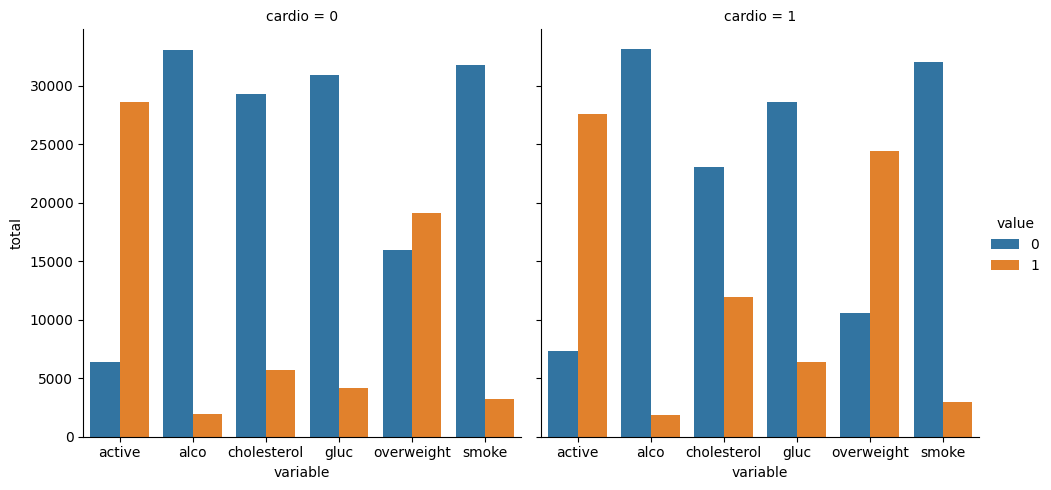

In [6]:
# 4. Draw the Categorical Plot
def draw_cat_plot():
    # 5. Create DataFrame for the cat plot using pd.melt
    df_cat = pd.melt(
        df,
        id_vars=['cardio'],
        value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight']
    )

    # 6. Group and reformat the data to show the counts of each feature
    df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index(name='total')

    # 7. Create a seaborn catplot
    catplot = sns.catplot(
        data=df_cat,
        x='variable', y='total', hue='value',
        col='cardio', kind='bar'
    )

    # 8. Get the figure for the output
    fig = catplot.fig

    # 9. Save the figure
    fig.savefig('catplot.png')
    return fig

# Execute draw cat plot function
catplot_fig = draw_cat_plot()
print('catplot.png')

heatmap.png


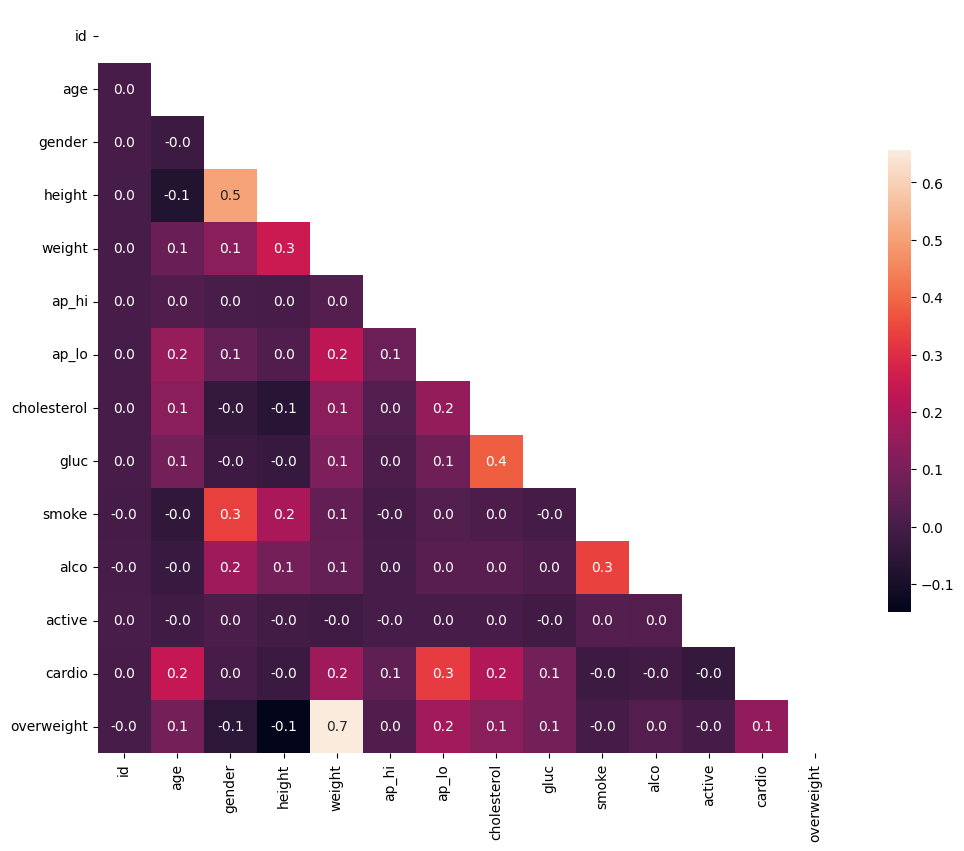

In [8]:
# 10. Draw the Heat Map
def draw_heat_map():
    # 11. Clean the data
    df_heat = df[
        (df['ap_lo'] <= df['ap_hi']) &
        (df['height'] >= df['height'].quantile(0.025)) &
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) &
        (df['weight'] <= df['weight'].quantile(0.975))
    ]

    # 12. Calculate the correlation matrix
    corr = df_heat.corr()

    # 13. Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # 14. Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(12, 12))

    # 15. Draw the heatmap
    sns.heatmap(
        corr, mask=mask, annot=True, fmt='.1f',
        square=True, cbar_kws={'shrink': 0.5}, ax=ax
    )

    # 16. Save the figure
    fig.savefig('heatmap.png')
    return fig

# Execute draw heat map function
heatmap_fig = draw_heat_map()
print('heatmap.png')